In [44]:
pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [47]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [48]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load dataset from CSV
csv = 'data.csv'
df = pd.read_csv(csv)

GETTING THE INFORMATION OF THE DATASET

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CPU_Clock_Speed       1000 non-null   float64
 1   CPU_Cores             1000 non-null   int64  
 2   CPU_Cache_Size        1000 non-null   int64  
 3   CPU_TDP               1000 non-null   int64  
 4   CPU_Brand_Model       1000 non-null   object 
 5   GPU_Clock_Speed       1000 non-null   int64  
 6   GPU_Cores             1000 non-null   int64  
 7   GPU_Memory_Size       1000 non-null   int64  
 8   GPU_Memory_Bandwidth  1000 non-null   int64  
 9   GPU_Brand_Model       1000 non-null   object 
 10  Performance_Metric    1000 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 86.1+ KB


CHECK FOR NULL VALUES

In [3]:
df.isnull().sum()

CPU_Clock_Speed         0
CPU_Cores               0
CPU_Cache_Size          0
CPU_TDP                 0
CPU_Brand_Model         0
GPU_Clock_Speed         0
GPU_Cores               0
GPU_Memory_Size         0
GPU_Memory_Bandwidth    0
GPU_Brand_Model         0
Performance_Metric      0
dtype: int64

In [4]:
df

,CPU_Clock_Speed,CPU_Cores,CPU_Cache_Size,CPU_TDP,CPU_Brand_Model,GPU_Clock_Speed,GPU_Cores,GPU_Memory_Size,GPU_Memory_Bandwidth,GPU_Brand_Model,Performance_Metric
0,3.8,7,15,103,AMD Ryzen 5,1522,481,3,368,NVIDIA GTX 1050,1822
1,2.7,12,28,144,Intel Core i7,1622,131,7,148,NVIDIA GTX 1060,955
2,3.8,7,10,100,Intel Core i7,1380,439,7,325,AMD Radeon RX 570,1059
3,3.2,10,9,88,AMD Ryzen 5,1010,377,6,208,NVIDIA GTX 1650,1918
4,2.2,8,16,123,Intel Core i7,1489,458,8,137,AMD Radeon RX 580,1329
...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,2,25,120,Intel Core i5,1656,479,6,227,AMD Radeon RX 570,701
996,2.0,12,7,101,Intel Core i5,1244,180,7,257,NVIDIA GTX 1660,1607
997,4.1,3,32,91,AMD Ryzen 7,1242,349,10,147,AMD Radeon RX 580,1958
998,2.1,11,28,149,Intel Core i3,1877,287,4,155,NVIDIA GTX 1660,1765


In [5]:
# Convert categorical variables to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['CPU_Brand_Model', 'GPU_Brand_Model'])

In [6]:
# User input for features
user_input = {
    'CPU_Clock_Speed': float(input("Enter CPU Clock Speed (GHz): ")),
    'CPU_Cores': int(input("Enter number of CPU Cores: ")),
    'CPU_Cache_Size': int(input("Enter CPU Cache Size (MB): ")),
    'CPU_TDP': int(input("Enter CPU TDP (Watts): ")),
    'GPU_Clock_Speed': float(input("Enter GPU Clock Speed (MHz): ")),
    'GPU_Cores': int(input("Enter number of GPU Cores: ")),
    'GPU_Memory_Size': int(input("Enter GPU Memory Size (GB): ")),
    'GPU_Memory_Bandwidth': int(input("Enter GPU Memory Bandwidth (bits): "))
}

Enter CPU Clock Speed (GHz):  4.5
Enter number of CPU Cores:  12
Enter CPU Cache Size (MB):  30
Enter CPU TDP (Watts):  180
Enter GPU Clock Speed (MHz):  1772
Enter number of GPU Cores:  782
Enter GPU Memory Size (GB):  8
Enter GPU Memory Bandwidth (bits):  782


Convert user input to DataFrame

In [8]:
# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

Set Features and target

In [9]:
# Features and target
features = ['CPU_Clock_Speed', 'CPU_Cores', 'CPU_Cache_Size', 'CPU_TDP',
            'GPU_Clock_Speed', 'GPU_Cores', 'GPU_Memory_Size', 'GPU_Memory_Bandwidth']

In [10]:
from sklearn.model_selection import train_test_split
x = df[features]
y = df['Performance_Metric']

In [11]:
x

,CPU_Clock_Speed,CPU_Cores,CPU_Cache_Size,CPU_TDP,GPU_Clock_Speed,GPU_Cores,GPU_Memory_Size,GPU_Memory_Bandwidth
0,3.8,7,15,103,1522,481,3,368
1,2.7,12,28,144,1622,131,7,148
2,3.8,7,10,100,1380,439,7,325
3,3.2,10,9,88,1010,377,6,208
4,2.2,8,16,123,1489,458,8,137
...,...,...,...,...,...,...,...,...
995,3.0,2,25,120,1656,479,6,227
996,2.0,12,7,101,1244,180,7,257
997,4.1,3,32,91,1242,349,10,147
998,2.1,11,28,149,1877,287,4,155


In [12]:
y

0      1822
1       955
2      1059
3      1918
4      1329
       ... 
995     701
996    1607
997    1958
998    1765
999    1761
Name: Performance_Metric, Length: 1000, dtype: int64

SPLIT THE TRAIN AND TEST DATA SET

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
x_test

,CPU_Clock_Speed,CPU_Cores,CPU_Cache_Size,CPU_TDP,GPU_Clock_Speed,GPU_Cores,GPU_Memory_Size,GPU_Memory_Bandwidth
993,3.6,12,26,130,1357,302,7,299
859,3.0,4,11,49,1484,178,7,101
298,3.0,7,17,53,1928,320,7,354
553,2.9,10,25,121,1328,410,6,104
672,2.9,3,24,71,1184,472,2,217
...,...,...,...,...,...,...,...,...
679,2.3,7,5,126,1700,450,8,358
722,2.4,4,7,58,1891,440,9,356
215,2.5,5,25,102,1788,174,3,350
653,2.0,5,12,138,1757,294,3,125


In [15]:
train_data=x_train.join(y_train)
train_data

,CPU_Clock_Speed,CPU_Cores,CPU_Cache_Size,CPU_TDP,GPU_Clock_Speed,GPU_Cores,GPU_Memory_Size,GPU_Memory_Bandwidth,Performance_Metric
687,3.2,2,25,115,1318,183,6,197,1948
500,2.8,3,15,113,1138,468,3,271,1010
332,4.2,10,14,116,1737,429,6,289,728
979,3.4,3,13,96,1367,165,8,145,789
817,2.3,7,32,107,1579,199,9,182,1409
...,...,...,...,...,...,...,...,...,...
835,4.1,10,13,135,1316,175,12,341,572
192,4.4,9,9,135,1122,429,9,128,1433
629,2.6,6,32,71,1970,206,10,122,901
559,4.1,9,4,120,1515,490,11,101,950


In [16]:
y_test = df['Performance_Metric'].values

In [17]:
y_test

array([1822,  955, 1059, 1918, 1329,  795, 1399,  759, 1658, 1712, 1790,
       1305, 1084, 1136, 1597, 1107,  897,  774,  975, 1947, 1245, 1979,
       1234,  978, 1361, 1460, 1933,  988, 1672, 1619,  511, 1392, 1879,
       1023, 1704,  729,  519, 1368,  838, 1990, 1914, 1733,  841, 1218,
       1563,  595, 1955, 1055, 1106,  932,  950,  578, 1698,  997, 1943,
       1687, 1662,  806, 1676,  707,  986, 1406,  892, 1626,  851, 1632,
       1159,  647,  595,  826,  974,  898, 1821, 1685, 1041, 1842, 1993,
        977, 1471, 1736, 1580,  541, 1654,  578, 1568, 1833, 1708, 1037,
       1654, 1780, 1837,  619, 1985, 1923, 1348,  931,  516,  507, 1217,
        713, 1041, 1246,  763, 1679,  941,  718, 1030, 1147, 1752, 1721,
       1761, 1385,  567, 1147, 1342, 1587, 1788, 1982, 1820, 1181, 1012,
        917, 1254,  585,  923, 1399, 1791, 1972, 1694, 1285,  695, 1361,
        659, 1389,  957, 1615, 1646, 1613, 1310,  801, 1034, 1031, 1233,
        615,  824, 1127,  820, 1858, 1369,  992, 18

array([[<Axes: title={'center': 'CPU_Clock_Speed'}>,
        <Axes: title={'center': 'CPU_Cores'}>,
        <Axes: title={'center': 'CPU_Cache_Size'}>],
       [<Axes: title={'center': 'CPU_TDP'}>,
        <Axes: title={'center': 'GPU_Clock_Speed'}>,
        <Axes: title={'center': 'GPU_Cores'}>],
       [<Axes: title={'center': 'GPU_Memory_Size'}>,
        <Axes: title={'center': 'GPU_Memory_Bandwidth'}>,
        <Axes: title={'center': 'Performance_Metric'}>]], dtype=object)

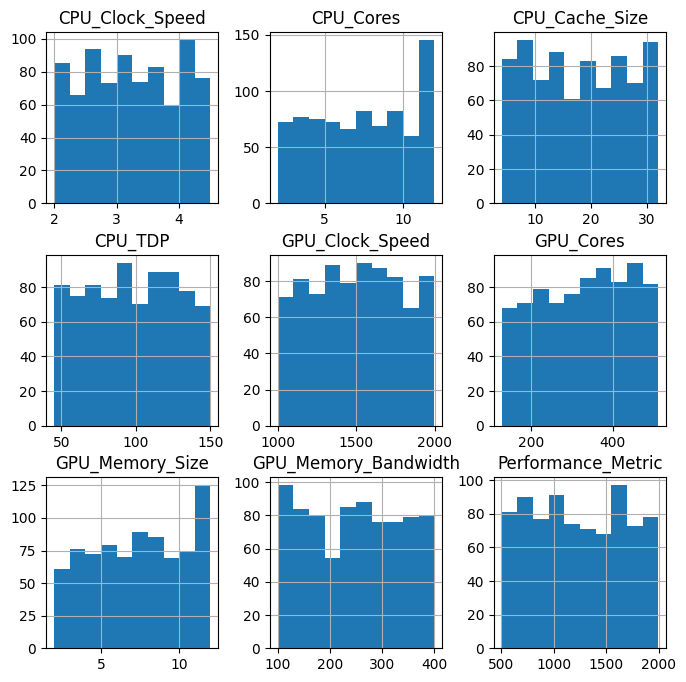

In [18]:
train_data.hist(figsize=(8,8))

In [19]:
train_data.corr()

,CPU_Clock_Speed,CPU_Cores,CPU_Cache_Size,CPU_TDP,GPU_Clock_Speed,GPU_Cores,GPU_Memory_Size,GPU_Memory_Bandwidth,Performance_Metric
CPU_Clock_Speed,1.000000,0.030933,0.026289,0.018280,-0.013674,0.068844,0.029448,0.048416,0.019126
CPU_Cores,0.030933,1.000000,-0.024582,0.018433,-0.025523,-0.030932,-0.021305,0.021013,-0.005593
CPU_Cache_Size,0.026289,-0.024582,1.000000,-0.017445,0.029216,-0.026146,-0.023424,0.005313,0.010177
CPU_TDP,0.018280,0.018433,-0.017445,1.000000,-0.014389,0.043245,0.004963,0.017014,-0.025565
GPU_Clock_Speed,-0.013674,-0.025523,0.029216,-0.014389,1.000000,0.021855,0.019795,0.006523,-0.001664
GPU_Cores,0.068844,-0.030932,-0.026146,0.043245,0.021855,1.000000,0.056911,-0.009169,0.012174
GPU_Memory_Size,0.029448,-0.021305,-0.023424,0.004963,0.019795,0.056911,1.000000,-0.003822,0.004930
GPU_Memory_Bandwidth,0.048416,0.021013,0.005313,0.017014,0.006523,-0.009169,-0.003822,1.000000,0.047748
Performance_Metric,0.019126,-0.005593,0.010177,-0.025565,-0.001664,0.012174,0.004930,0.047748,1.000000


<Axes: >

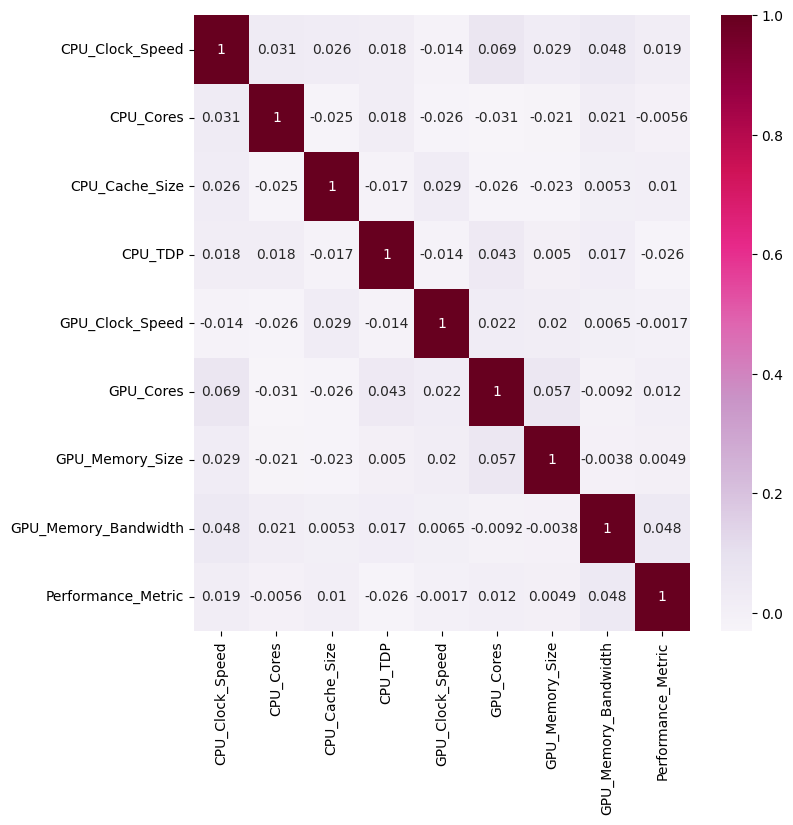

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(train_data.corr(),annot=True,cmap="PuRd")

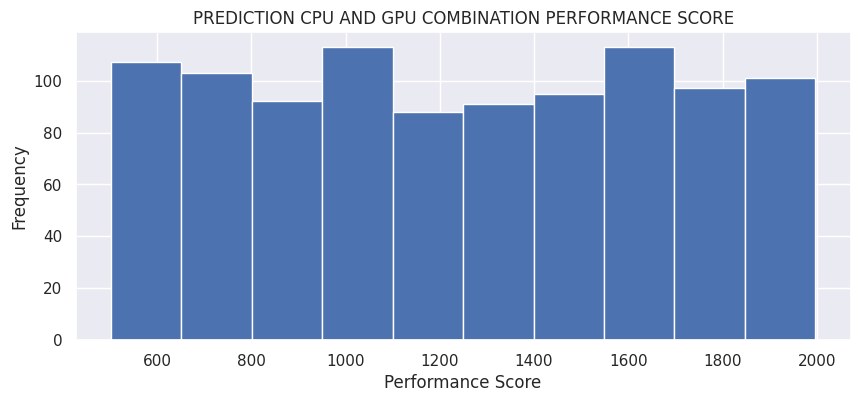

In [21]:
sns.set()

plt.figure(figsize=(10, 4))
plt.title("PREDICTION CPU AND GPU COMBINATION PERFORMANCE SCORE")
plt.xlabel("Performance Score")
plt.ylabel("Frequency")
plt.hist(df["Performance_Metric"])
plt.show()

In [22]:
X_train = df[features].values
Y_train = df['Performance_Metric'].values

In [23]:
x_test

,CPU_Clock_Speed,CPU_Cores,CPU_Cache_Size,CPU_TDP,GPU_Clock_Speed,GPU_Cores,GPU_Memory_Size,GPU_Memory_Bandwidth
993,3.6,12,26,130,1357,302,7,299
859,3.0,4,11,49,1484,178,7,101
298,3.0,7,17,53,1928,320,7,354
553,2.9,10,25,121,1328,410,6,104
672,2.9,3,24,71,1184,472,2,217
...,...,...,...,...,...,...,...,...
679,2.3,7,5,126,1700,450,8,358
722,2.4,4,7,58,1891,440,9,356
215,2.5,5,25,102,1788,174,3,350
653,2.0,5,12,138,1757,294,3,125


In [24]:
y_test

array([1822,  955, 1059, 1918, 1329,  795, 1399,  759, 1658, 1712, 1790,
       1305, 1084, 1136, 1597, 1107,  897,  774,  975, 1947, 1245, 1979,
       1234,  978, 1361, 1460, 1933,  988, 1672, 1619,  511, 1392, 1879,
       1023, 1704,  729,  519, 1368,  838, 1990, 1914, 1733,  841, 1218,
       1563,  595, 1955, 1055, 1106,  932,  950,  578, 1698,  997, 1943,
       1687, 1662,  806, 1676,  707,  986, 1406,  892, 1626,  851, 1632,
       1159,  647,  595,  826,  974,  898, 1821, 1685, 1041, 1842, 1993,
        977, 1471, 1736, 1580,  541, 1654,  578, 1568, 1833, 1708, 1037,
       1654, 1780, 1837,  619, 1985, 1923, 1348,  931,  516,  507, 1217,
        713, 1041, 1246,  763, 1679,  941,  718, 1030, 1147, 1752, 1721,
       1761, 1385,  567, 1147, 1342, 1587, 1788, 1982, 1820, 1181, 1012,
        917, 1254,  585,  923, 1399, 1791, 1972, 1694, 1285,  695, 1361,
        659, 1389,  957, 1615, 1646, 1613, 1310,  801, 1034, 1031, 1233,
        615,  824, 1127,  820, 1858, 1369,  992, 18

In [25]:
X_train

array([[  3.8,   7. ,  15. , ..., 481. ,   3. , 368. ],
       [  2.7,  12. ,  28. , ..., 131. ,   7. , 148. ],
       [  3.8,   7. ,  10. , ..., 439. ,   7. , 325. ],
       ...,
       [  4.1,   3. ,  32. , ..., 349. ,  10. , 147. ],
       [  2.1,  11. ,  28. , ..., 287. ,   4. , 155. ],
       [  3.7,   7. ,   5. , ..., 408. ,   7. , 193. ]])

LINEAR REGRESSION

In [40]:
from sklearnex.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

DecisionTreeRegressor

In [42]:
model1 = DecisionTreeRegressor()
model1.fit(X_train,Y_train)

DecisionTreeRegressor()

In [28]:
y_predict1 = model.predict(user_df)
y_predict1[0]

/home/uaa8d12bb83c4f1a564fbcdac351918c/.local/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


1319.6749899225376

In [29]:
y_predict = model.predict(user_df)

/home/uaa8d12bb83c4f1a564fbcdac351918c/.local/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [30]:
y_predict[0]

1319.6749899225376

In [31]:
y_test[298]

1327

In [32]:
y_predict2 = model1.predict(user_df)
y_predict1[0]

/home/uaa8d12bb83c4f1a564fbcdac351918c/.local/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


1319.6749899225376

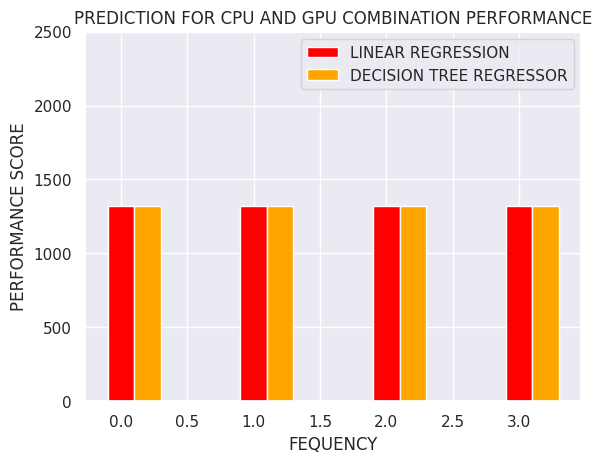

In [33]:
plt.bar(range(4), y_predict[:10], width=0.2, label="LINEAR REGRESSION", color='red') #right sfted value by 2.0
plt.bar([i + 0.2 for i in range(4)], y_predict1[:4], width=0.2, label="DECISION TREE REGRESSOR", color='orange') #left shifted value by 2.0

plt.title("PREDICTION FOR CPU AND GPU COMBINATION PERFORMANCE")
plt.xlabel("FEQUENCY")
plt.ylabel("PERFORMANCE SCORE")
plt.legend(loc='upper right')
plt.ylim(0, 2500)
plt.show()

Visualization

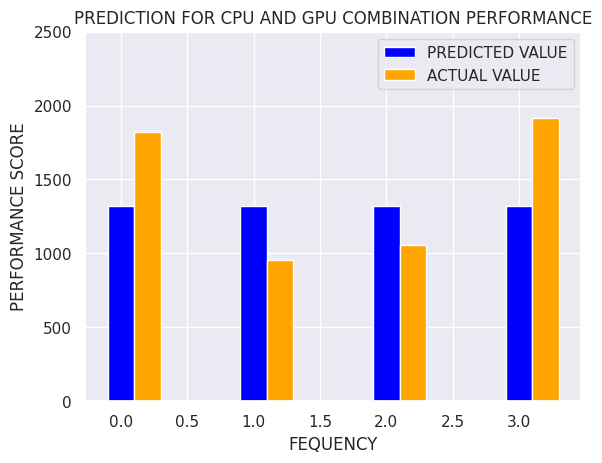

In [34]:
plt.bar(range(4), y_predict[:10], width=0.2, label="PREDICTED VALUE", color='blue') #right sfted value by 2.0
plt.bar([i + 0.2 for i in range(4)], y_test[:4], width=0.2, label="ACTUAL VALUE", color='orange') #left shifted value by 2.0

plt.title("PREDICTION FOR CPU AND GPU COMBINATION PERFORMANCE")
plt.xlabel("FEQUENCY")
plt.ylabel("PERFORMANCE SCORE")
plt.legend(loc='upper right')
plt.ylim(0, 2500)
plt.show()

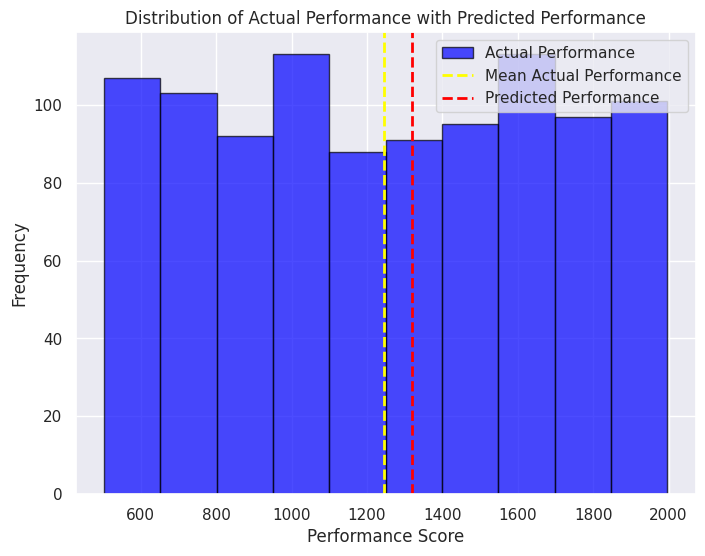

In [35]:
# Visualization
plt.figure(figsize=(8, 6))

# Plot actual performance distribution
plt.hist(y, bins=10,color='blue', edgecolor='black',alpha=0.7, label='Actual Performance')

# Plot vertical line for mean of actual performance
plt.axvline(y.mean(), color='yellow', linestyle='dashed', linewidth=2, label='Mean Actual Performance')

# Plot predicted performance
plt.axvline(y_predict[0], color='red', linestyle='dashed', linewidth=2, label='Predicted Performance')

plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Performance with Predicted Performance')
plt.legend()
plt.show()

Predicted Performance Score

In [36]:
print(f"Predicted Performance Score: {y_predict[0]}")

Predicted Performance Score: 1319.6749899225376


In [37]:
pip install gradio

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for gradio-client==0.11.0 from https://files.pythonhosted.org/packages/56/12/961688d564c46d43bc08d8851b2cd23150a1e4c7a1d0bf6fc1f3edadcf7d/gradio_client-0.11.0-py3-none-any.whl.metadata
  Using cached gradio_client-0.11.0-py3-none-any.whl.metadata (7.1 kB)
Using cached gradio_client-0.11.0-py3-none-any.whl (308 kB)
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.12.0
    Not uninstalling gradio-client at /home/uaa8d12bb83c4f1a564fbcdac351918c/.local/lib/python3.11/site-packages, outside environment /srv/jupyter/python-venv
    Can't uninstall 'gradio_client'. No files were found to uninstall.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
!pip install gradio

Defaulting to user installation because normal site-packages is not writeable


In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import gradio as gr 

# Load dataset from CSV
df = pd.read_csv('data.csv')

# Linear Regression model
model = LinearRegression()
features = ['CPU_Clock_Speed', 'CPU_Cores', 'CPU_Cache_Size', 'CPU_TDP',
            'GPU_Clock_Speed', 'GPU_Cores', 'GPU_Memory_Size', 'GPU_Memory_Bandwidth']
X_train = df[features].values
Y_train = df['Performance_Metric'].values
model.fit(X_train, Y_train)

def predict_performance_metric(cpu_clock_speed, cpu_cores, cpu_cache_size, cpu_tdp, gpu_clock_speed, gpu_cores, gpu_memory_size, gpu_memory_bandwidth):
    input_features = np.array([[cpu_clock_speed, cpu_cores, cpu_cache_size, cpu_tdp, gpu_clock_speed, gpu_cores, gpu_memory_size, gpu_memory_bandwidth]])
    performance_metric = model.predict(input_features)
    return performance_metric
# Create input components
cpu_clock_speed = gr.components.Slider( label="CPU Clock Speed (GHz)")
cpu_cores = gr.components.Number(label="CPU Cores")
cpu_cache_size = gr.components.Number(label="CPU Cache Size (MB)")
cpu_tdp = gr.components.Number(label="CPU TDP (WATTS)")
gpu_clock_speed = gr.components.Number(label="GPU Clock Speed (MHz)")
gpu_cores = gr.components.Number(label="GPU Cores")
gpu_memory_size = gr.components.Number(label="GPU Memory Size (GB)")
gpu_memory_bandwidth = gr.components.Number(label="GPU Memory Bandwidth (GB/s)")

# Create output component
output = gr.components.Textbox(label="Predicted Performance Metric")

try:
    # Create Gradio interface with components
    interface = gr.Interface(fn=predict_performance_metric,
                             inputs=[cpu_clock_speed, cpu_cores, cpu_cache_size, cpu_tdp,
                                     gpu_clock_speed, gpu_cores, gpu_memory_size, gpu_memory_bandwidth],
                             outputs=output,
                             title="Performance Metric Predictor",
                             description="Enter CPU and GPU specifications to predict the Performance Metric.")
    # Launch the interface
    interface.launch()
except gr.InterfaceError as e:
    # Handle connection errors gracefully
    print("Connection error:", e)
    print("Please check your internet connection and try again.")


ImportError: cannot import name 'file' from 'gradio_client' (/home/uaa8d12bb83c4f1a564fbcdac351918c/.local/lib/python3.11/site-packages/gradio_client/__init__.py)